In [104]:
import yfinance as yf
from pandas_datareader import data as pdr
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

pd.set_option('display.width', 1000)

In [105]:
yf.pdr_override()

In [106]:
start = '2000-01-01'
data = pdr.get_data_yahoo('005930.KS', start=start)
data.drop('Adj Close', axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [107]:
data['Prev_close'] = data['Close'].shift()
data['Rate'] = (data['Close'] - data['Prev_close']) / data['Prev_close'] * 100
data['Rate'][0] = (data['Close'][0] - data['Open'][0]) / data['Open'][0] * 100
data['Rate'] = data['Rate'].round(decimals=2)

data.reset_index(inplace=True)
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data.set_index(data['Date'], inplace=True)
data.drop(['Date', 'Prev_close'], axis=1, inplace=True)

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


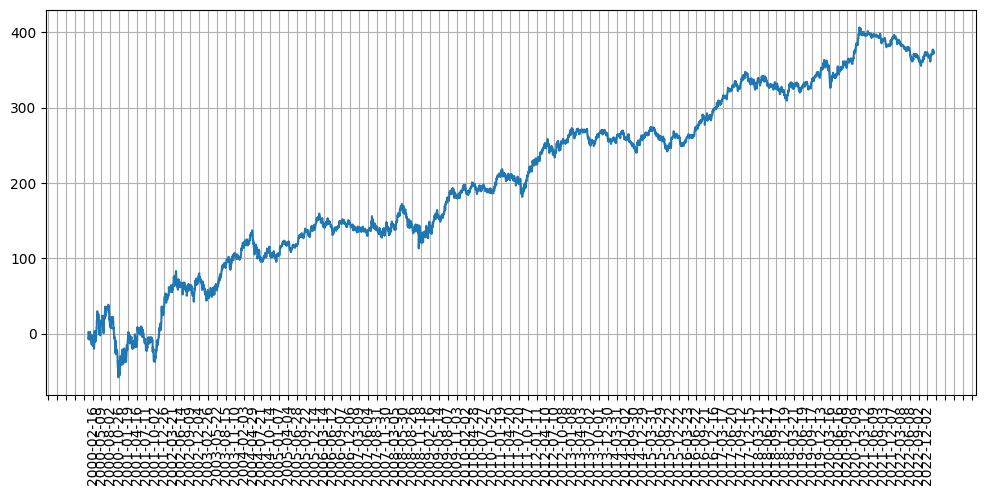

In [108]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Rate'].cumsum())
plt.grid()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
plt.show()

In [109]:
window_size = 20
data_rolling = data['Close'].rolling(window_size, min_periods=1)
data[f'MA_{window_size}'] = data_rolling.mean().astype(np.int32)

In [110]:
data['Upper Band'] = data[f'MA_{window_size}'] + (2 * data_rolling.std())
data['Lower Band'] = data[f'MA_{window_size}'] - (2 * data_rolling.std())
data['Upper Band'][0] = data[f'MA_{window_size}'][0] + (2 * np.std([data['Open'][0], data['Close'][0]]))
data['Lower Band'][0] = data[f'MA_{window_size}'][0] - (2 * np.std([data['Open'][0], data['Close'][0]]))

data['Upper Band'] = data['Upper Band'].round(2)
data['Lower Band'] = data['Lower Band'].round(2)

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


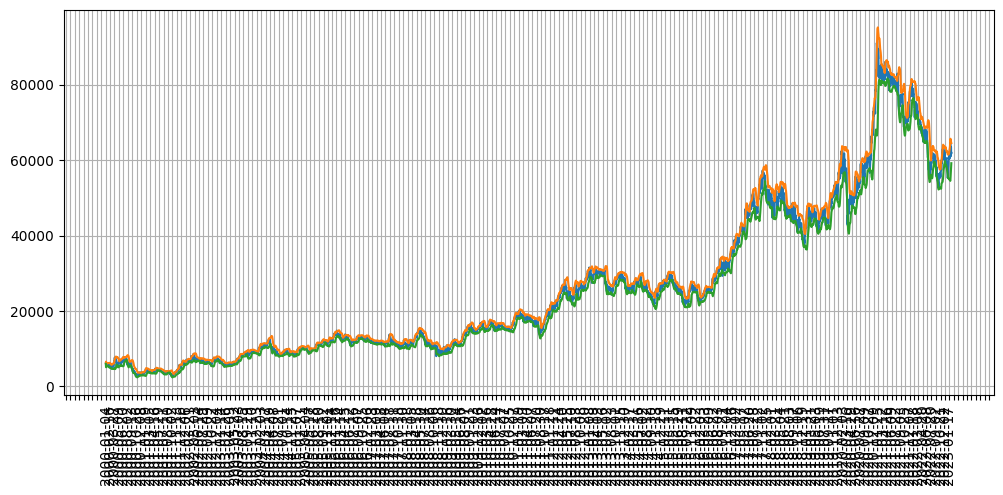

In [111]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close'])
plt.plot(data.index, data['Upper Band'])
plt.plot(data.index, data['Lower Band'])
plt.grid()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
plt.show()

In [112]:
kospi = pdr.get_data_yahoo('^KS11', start=start)

[*********************100%***********************]  1 of 1 completed


In [113]:
kospi.reset_index(inplace=True)
kospi['Date'] = kospi['Date'].dt.strftime('%Y-%m-%d')
kospi.set_index(kospi['Date'], inplace=True)
kospi.drop(['Date'], axis=1, inplace=True)

In [114]:
df = pd.concat([data, kospi['Close'].round(2)], axis=1)
df.columns = data.columns.append(pd.Index(['Kospi']))

In [115]:
df

,Open,High,Low,Close,Volume,Rate,MA_20,Upper Band,Lower Band,Kospi
Date,,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,74195000,1.83,6110,6220.00,6000.00,1059.04
2000-01-05,5800.0,6060.0,5520.0,5580.0,74680000,-8.67,5845,6594.53,5095.47,986.31
2000-01-06,5750.0,5780.0,5580.0,5620.0,54390000,0.72,5770,6360.25,5179.75,960.79
2000-01-07,5560.0,5670.0,5360.0,5540.0,40305000,-1.42,5712,6246.01,5177.99,948.65
2000-01-10,5600.0,5770.0,5580.0,5770.0,46880000,4.15,5724,6189.32,5258.68,987.24
...,...,...,...,...,...,...,...,...,...,...
2023-02-01,62600.0,62700.0,61000.0,61000.0,98585,-0.65,60825,65095.28,56554.72,2449.80
2023-02-02,63200.0,63900.0,62600.0,63500.0,65992,4.10,61230,64815.41,57644.59,2468.88
2023-02-03,63900.0,64000.0,63000.0,63500.0,47567,0.00,61515,64849.84,58180.16,2480.40


In [116]:
df[df['Volume']==0]

,Open,High,Low,Close,Volume,Rate,MA_20,Upper Band,Lower Band,Kospi
Date,,,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,0,0.0,5662,6261.75,5062.25,NaN
2000-03-01,5120.0,5120.0,5120.0,5120.0,0,0.0,5231,5733.26,4728.74,NaN
2000-04-05,6800.0,6800.0,6800.0,6800.0,0,0.0,6225,7747.80,4702.20,NaN
2000-04-13,6910.0,6910.0,6910.0,6910.0,0,0.0,6713,7832.27,5593.73,NaN
2000-05-01,6000.0,6000.0,6000.0,6000.0,0,0.0,6301,7507.36,5094.64,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,0,0.0,73545,75935.75,71154.25,2699.18
2022-03-04,72900.0,72900.0,72900.0,72900.0,0,0.0,73525,75874.36,71175.64,2713.43
2022-03-10,69500.0,69500.0,69500.0,69500.0,0,0.0,72980,76640.08,69319.92,2680.32


In [117]:
df_for_test = df.iloc[:, :5]
# df_for_test.replace(0, method='bfill', inplace=True)
# df_for_test.describe()

,Open,High,Low,Close,Volume
count,5797.000000,5797.000000,5797.000000,5797.000000,5.797000e+03
mean,25940.633086,26200.251854,25675.316543,25934.873210,2.245304e+07
std,20688.039090,20857.736278,20509.938339,20672.375509,1.567969e+07
min,2540.000000,2760.000000,2420.000000,2730.000000,2.765000e+04
25%,10340.000000,10500.000000,10200.000000,10360.000000,1.215200e+07
50%,17700.000000,17880.000000,17440.000000,17680.000000,1.800945e+07
75%,39000.000000,39560.000000,38700.000000,39150.000000,2.764280e+07
max,90300.000000,96800.000000,89500.000000,91000.000000,1.642150e+08


In [118]:
ticker = "AAPL"
stock_info = yf.Ticker(ticker)

In [119]:
stock_info.info['trailingPE']
stock_info.info['priceToBook']

42.370842

In [ ]:
import tensorflow as tf
from keras.layers import Layer, Dropout, LayerNormalization, Conv1D, Concatenate, GlobalAveragePooling1D, Dense, Input
from keras.models import Model

batch_size = 32
seq_len = 128

# feature: Open, High, Low, Close, Volume(, Rate, MA_20, Upper Band, Lower Band, Kospi)
# periodic_feature = ['', '']
# non_periodic_feature = ['', '']

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256

class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) # Convert (batch, seq_len, 5) to (batch, seq_len)
    time_linear = self.weights_linear * x + self.bias_linear
    time_linear = tf.expand_dims(time_linear, axis=-1) # (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # (batch, seq_len, 2)

class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    self.key = Dense(self.d_k, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    self.value = Dense(self.d_v, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out 


class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    self.linear = Dense(7, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear 

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    self.ff_conv1D_2 = Conv1D(filters=7, kernel_size=1) # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 

def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model

# for col in df_for_test.columns:
#     i = df_for_test[col].min()
#     a = df_for_test[col].max()
#     df_for_test[col] = (df_for_test[col]-i) / (a-i)

X_train, y_train = [], []
for i in range(seq_len, len(df_for_test)):
  X_train.append(df_for_test[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(df_for_test.iloc[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train, dtype=np.int32), np.array(y_train, dtype=np.int32)

finance_feature = [8.61, 1.08, 13.42]

transformer = create_model()
history = transformer.fit(X_train, y_train, batch_size=batch_size, epochs=10)

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(y_train, data['Close'], label='X')
plt.plot(transformer.predict(X_train), label='Y')
plt.grid()
plt.legend()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
plt.show()